In [87]:
#Q:1
import pandas as pd

# Import data
df = pd.read_csv('C:\\Users\\PMLS\\Documents\\zoya\\zoya\\ML internship\\ML Internship Task 4\\ML internship Task 4\\userbehaviour.csv')

# Check for null values
null_values = df.isnull().sum()

# Display column information
column_info = df.info()

# Get descriptive statistics
statistics = df.describe()

# Display the results
print("Null Values:")
print(null_values)
print("\nColumn Information:")
print(column_info)
print("\nDescriptive Statistics:")
print(statistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
Null Values:
userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                    

In [88]:
#Q:2
import pandas as pd

# Calculate highest, lowest, and average screen time
highest_screen_time = df['Average Screen Time'].max()
lowest_screen_time = df['Average Screen Time'].min()
average_screen_time = df['Average Screen Time'].mean()

# Display the results
print("Highest Screen Time:", highest_screen_time)
print("Lowest Screen Time:", lowest_screen_time)
print("Average Screen Time:", average_screen_time)


Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


In [89]:
#Q:3
import pandas as pd

# Calculate highest, lowest, and average amount spent
highest_amount_spent = df['Average Spent on App (INR)'].max()
lowest_amount_spent = df['Average Spent on App (INR)'].min()
average_amount_spent = df['Average Spent on App (INR)'].mean()

# Display the results
print("Highest Amount Spent (INR):", highest_amount_spent)
print("Lowest Amount Spent (INR):", lowest_amount_spent)
print("Average Amount Spent (INR):", average_amount_spent)


Highest Amount Spent (INR): 998.0
Lowest Amount Spent (INR): 0.0
Average Amount Spent (INR): 424.4154154154154


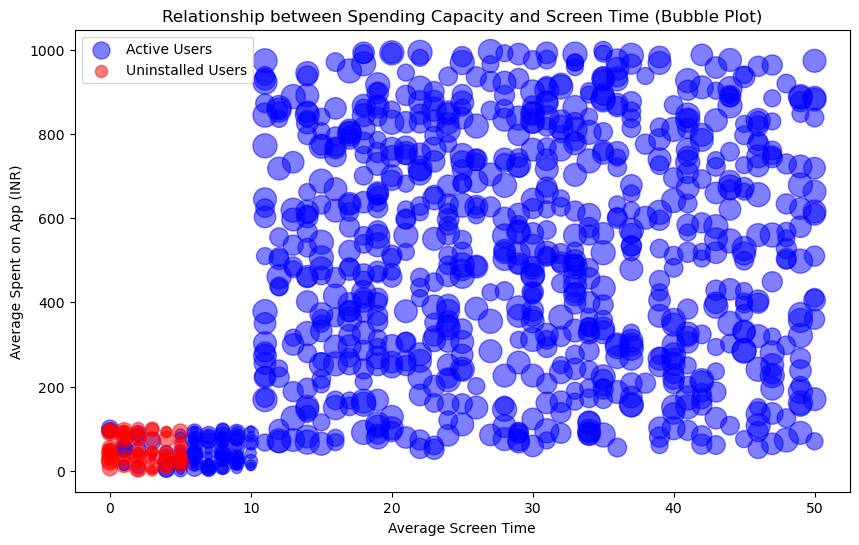

In [90]:
#Q:4
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for active users (Status: Installed) and uninstalled users (Status: Uninstalled)
active_users = df[df['Status'] == 'Installed']
uninstalled_users = df[df['Status'] == 'Uninstalled']

# Create a scatter plot with bubble size based on 'Ratings'
plt.figure(figsize=(10, 6))
plt.scatter(active_users['Average Screen Time'], active_users['Average Spent on App (INR)'],
            s=active_users['Ratings']*30, color='blue', alpha=0.5, label='Active Users')
plt.scatter(uninstalled_users['Average Screen Time'], uninstalled_users['Average Spent on App (INR)'],
            s=uninstalled_users['Ratings']*30, color='red', alpha=0.5, label='Uninstalled Users')

# Add labels and title
plt.xlabel('Average Screen Time')
plt.ylabel('Average Spent on App (INR)')
plt.title('Relationship between Spending Capacity and Screen Time (Bubble Plot)')

# Add legend
plt.legend()

# Show plot
plt.show()


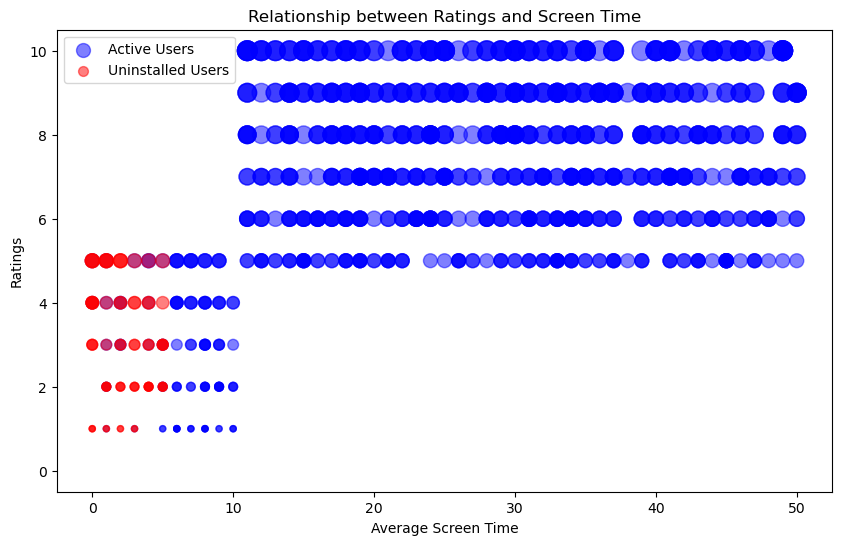

In [91]:
#Q:5
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing user behavior data

# Filter data for active users (Status: Installed) and uninstalled users (Status: Uninstalled)
active_users = df[df['Status'] == 'Installed']
uninstalled_users = df[df['Status'] == 'Uninstalled']

# Set the size of bubbles based on the ratings given
active_sizes = active_users['Ratings'] * 20  # Multiply by a scaling factor for better visibility
uninstalled_sizes = uninstalled_users['Ratings'] * 20

# Create a scatter plot with bubble sizes
plt.figure(figsize=(10, 6))
plt.scatter(active_users['Average Screen Time'], active_users['Ratings'],
            s=active_sizes, color='blue', label='Active Users', alpha=0.5)  # Use alpha for transparency
plt.scatter(uninstalled_users['Average Screen Time'], uninstalled_users['Ratings'],
            s=uninstalled_sizes, color='red', label='Uninstalled Users', alpha=0.5)

# Add labels and title
plt.xlabel('Average Screen Time')
plt.ylabel('Ratings')
plt.title('Relationship between Ratings and Screen Time')

# Add legend
plt.legend()

# Show plot
plt.show()


In [92]:
#Q;6
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Handle missing values if any
df.dropna(inplace=True)

# Convert categorical variables to numerical
df['Status'] = df['Status'].map({'Installed': 1, 'Uninstalled': 0})

# Select relevant features for clustering
features = ['Average Screen Time', 'Average Spent on App (INR)', 'Ratings']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (segments)
num_clusters = 3  # You can adjust this based on analysis or domain knowledge

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Analyze clusters
cluster_analysis = df.groupby('Cluster').mean()

# Identify retained users and lost users based on clusters
# For example, if cluster 0 represents retained users and cluster 1 represents lost users:
retained_users = df[df['Cluster'] == 0]
lost_users = df[df['Cluster'] == 1]

# Number of segments obtained
num_segments = num_clusters

# Display results
print(f"Number of Segments: {num_segments}")
print("Cluster Analysis:")
print(cluster_analysis)


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Number of Segments: 3
Cluster Analysis:
              userid  Average Screen Time  Average Spent on App (INR)  \
Cluster                                                                 
0        1509.750656            29.582677                  771.496063   
1        1499.200873             5.550218                   63.144105   
2        1490.920308            30.395887                  297.149100   

         Left Review   Ratings  New Password Request  Last Visited Minutes  \
Cluster                                                                      
0           0.488189  7.608924              4.414698           2612.286089   
1           0.506550  2.633188              6.353712          13657.030568   
2           0.501285  7.724936              4.627249           2527.113111   

           Status  
Cluster            
0        1.000000  
1        0.637555  
2        1.000000  


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


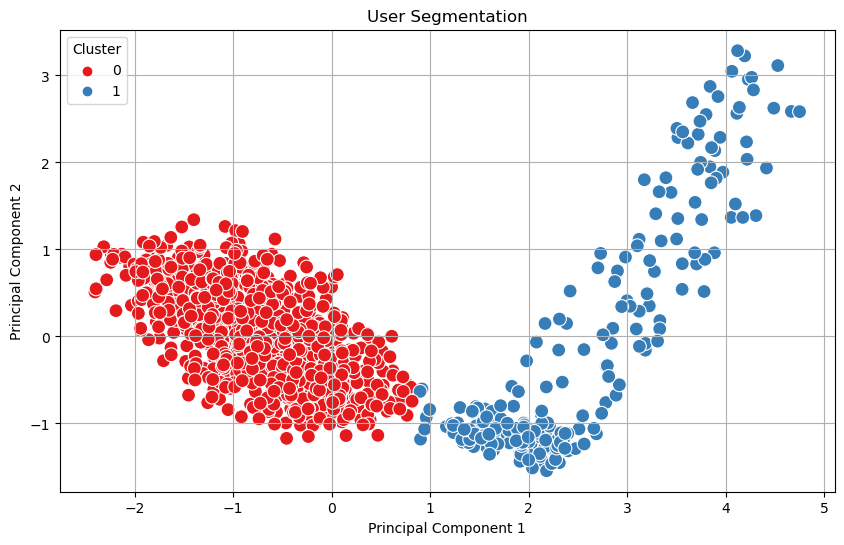

In [93]:
#Q:7
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\PMLS\\Documents\\zoya\\zoya\\ML internship\\ML Internship Task 4\\ML internship Task 4\\userbehaviour.csv')

# Drop non-numeric columns and any rows with missing values
df_numeric = df.drop(['userid', 'Left Review', 'New Password Request', 'Status'], axis=1).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters: retained and lost users
kmeans.fit(scaled_data)

# Add cluster labels to the dataframe
df_numeric['Cluster'] = kmeans.labels_

# Create a scatter plot to visualize the segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_numeric['Cluster'], palette='Set1', s=100)
plt.title('User Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Q.8: Explain the summary of your working

Data Loading and Preprocessing:
Loaded the dataset containing user behavior data.
Dropped non-numeric columns and removed rows with missing values to prepare the data for clustering.
Standardization and Dimensionality Reduction:
Standardized the numeric data to ensure all features have the same scale.
Applied Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2 components for visualization.
K-means Clustering:
Applied the K-means clustering algorithm to identify user segments.
Chose the number of clusters (2 clusters in this case) assuming retained and lost users.
Visualization:
Created a scatter plot using matplotlib and seaborn to visualize the segments based on the two principal components obtained from PCA.
Each cluster was represented by a different color in the scatter plot, making it easier to see how users are grouped based on their behavior patterns
The scatter plot helped visualize the segmentation results, showing the distribution of users in different clusters in a 2D space. This approach provided insights into the distinct user segments, such as retained users and lost users, based on their behavior patterns and engagement levels with the app.